In [ ]:
import pandas as pd
df=pd.read_csv(r'/content/sample_data/CaseStudyData.csv', encoding='utf-8')

In [ ]:
print (df[df.reported_sales_yoy.isnull()])

   entity                      company  \
13   TXRH         Texas Roadhouse Inc.   
27    EAT  Brinker International, Inc.   
42    DRI     Darden Restaurants, Inc.   

                                      metric period_end_dt reported_sales_yoy  
13         US Company-Owned Restaurant Sales    12/29/2020                NaN  
27         US Company-Owned Restaurant Sales    12/23/2020                NaN  
42  Reported Total Revenue (ex. Red Lobster)    11/29/2020                NaN  


In [ ]:
df['sales_yoy_float'] = df['reported_sales_yoy'].str.strip('%').astype(float)
df

,entity,company,metric,period_end_dt,reported_sales_yoy,sales_yoy_float
0,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,9/26/2017,12.3%,12.3
1,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,12/26/2017,12.6%,12.6
2,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,3/27/2018,10.5%,10.5
3,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,6/26/2018,11.0%,11.0
4,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,9/25/2018,9.9%,9.9
5,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,12/25/2018,11.0%,11.0
6,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,3/26/2019,10.1%,10.1
7,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,6/25/2019,9.7%,9.7
8,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,9/24/2019,9.4%,9.4
9,TXRH,Texas Roadhouse Inc.,US Company-Owned Restaurant Sales,12/31/2019,19.7%,19.7


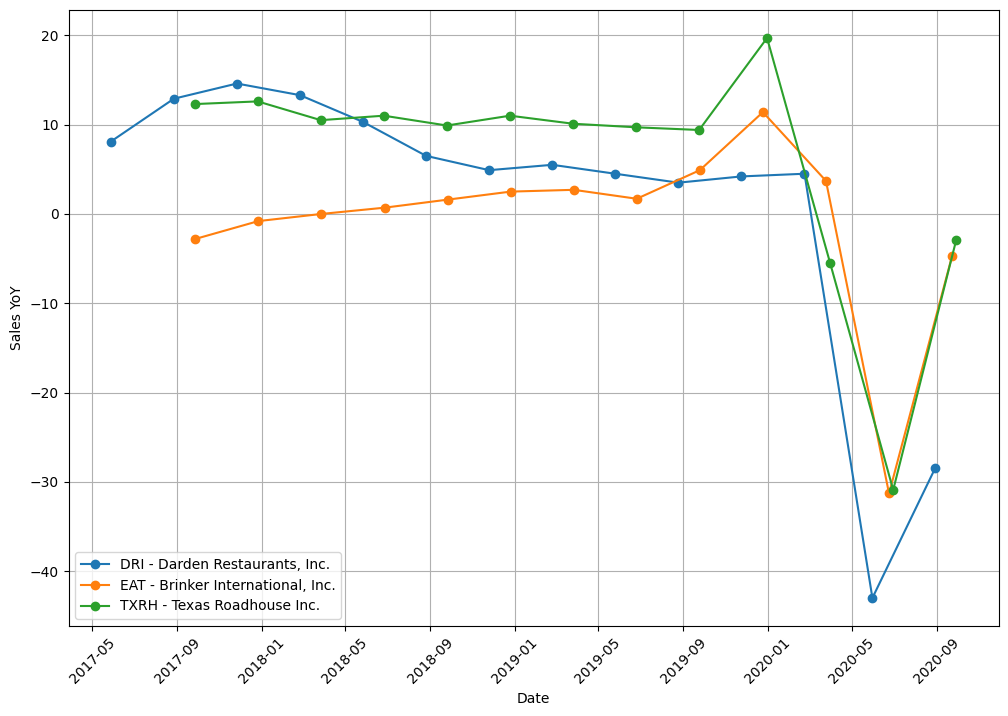

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['period_end_dt'] = pd.to_datetime(df['period_end_dt'])
grouped = df.groupby(['entity', 'company'])
plt.figure(figsize=(12, 8))
for (entity, company), group_data in grouped:
    plt.plot(group_data['period_end_dt'], group_data['sales_yoy_float'], marker='o', linestyle='-', label=f'{entity} - {company}')
plt.xticks(rotation=45)
plt.xlabel('Date') 
plt.ylabel('Sales YoY')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

## No noticable seasonality. Hence we can use ARIMA.
## Very volatile after 2019 due presumably due to Covid-19 Lockdown.

In [ ]:
df.describe()

,sales_yoy_float
count,40.00000
mean,2.19750
std,13.37927
min,-43.00000
25%,0.52500
50%,4.70000
75%,10.35000
max,19.70000


In [564]:
df = df[['entity', 'period_end_dt', 'sales_yoy_float']]
df.columns = ['entity' , 'period_end_dt', 'sales_yoy_float']
# df.head()

df=df.dropna()

Testing For Stationarity of **Data**


# DRI DF Test

**Differencing**

Auto Regressive **Model**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

In [ ]:
df_DRI

,period_end_dt,sales_yoy_float
28,2017-05-28,8.1
29,2017-08-27,12.9
30,2017-11-26,14.6
31,2018-02-25,13.3
32,2018-05-27,10.3
33,2018-08-26,6.5
34,2018-11-25,4.9
35,2019-02-24,5.5
36,2019-05-26,4.5
37,2019-08-25,3.5


In [ ]:
# df_DRI = df[df['entity'] == "DRI"]
# df_DRI["sales_yoy_float"]

df = df[['entity', 'period_end_dt', 'sales_yoy_float']]
df.columns = ['entity' , 'period_end_dt', 'sales_yoy_float']
# df.head()
df_DRI = df[['period_end_dt', 'sales_yoy_float']][df['entity'] == 'DRI']
# df_DRI.drop(42,axis=0, inplace=True)
# df_DRI.set_index('period_end_dt', inplace=True)
df_DRI

,period_end_dt,sales_yoy_float
28,2017-05-28,8.1
29,2017-08-27,12.9
30,2017-11-26,14.6
31,2018-02-25,13.3
32,2018-05-27,10.3
33,2018-08-26,6.5
34,2018-11-25,4.9
35,2019-02-24,5.5
36,2019-05-26,4.5
37,2019-08-25,3.5


In [ ]:
test_result=adfuller(df_DRI["sales_yoy_float"].dropna())
test_result

(3.131213191626794,
 1.0,
 5,
 8,
 {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625},
 52.26989414166469)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
# Perform the ADF test
def adfuller_test(df):
    
    adf_statistic = test_result[0]
    p_value = test_result[1]
    num_lags = test_result[2]
    num_observations = test_result[3]
    
    print("ADF Test Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("#Lags Used:", num_lags)
    print("Number of Observations Used:", num_observations)
    
    if p_value <= 0.05:
        print("P-value is less than or equal to 0.05, which means we can reject the null hypothesis (Ho).")
        print("Therefore, we can conclude that the data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis, which indicates that the time series has a unit root.")
        print("This suggests that the data is non-stationary.")


adfuller_test(df_DRI["sales_yoy_float"])

ADF Test Statistic: 3.131213191626794
p-value: 1.0
#Lags Used: 5
Number of Observations Used: 8
Weak evidence against the null hypothesis, which indicates that the time series has a unit root.
This suggests that the data is non-stationary.


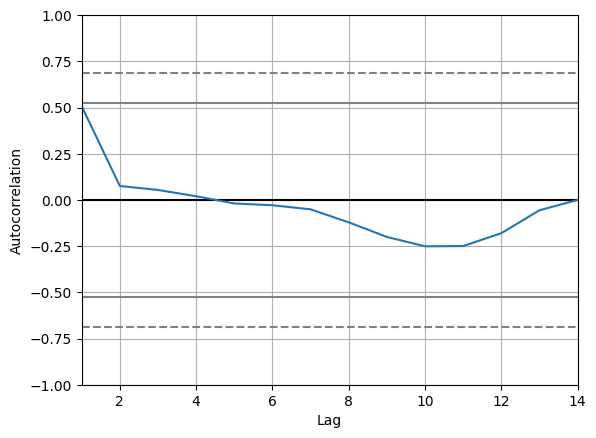

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_DRI["sales_yoy_float"])
plt.show()

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

In [ ]:
# For non-seasonal data
#p=1 (AR specification), d=1 (Integration order), q=0 or 1 (MA specification/polynomial)AR specification, Integration order, MA specification
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
model_DRI = ARIMA(df_DRI["sales_yoy_float"].values, order=(1, 0, 1))
model_DRI_fitted = model_DRI.fit()
model_DRI_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   14
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -55.760
Date:                Thu, 11 May 2023   AIC                            119.521
Time:                        20:52:24   BIC                            122.077
Sample:                             0   HQIC                           119.284
                                 - 14                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2977     31.240     -0.010      0.992     -61.526      60.931
ar.L1          0.5653      7.373      0.077      0.939     -13.885      15.016
ma.L1          0.0799     12.278      0.007      0.995     -23.984      24.144
sigma2       162.9786    110.989      1.468      0.142     -54.556     380.513
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                62.12
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              11.46   Skew:                            -3.11
Prob(H) (two-sided):                  0.02   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

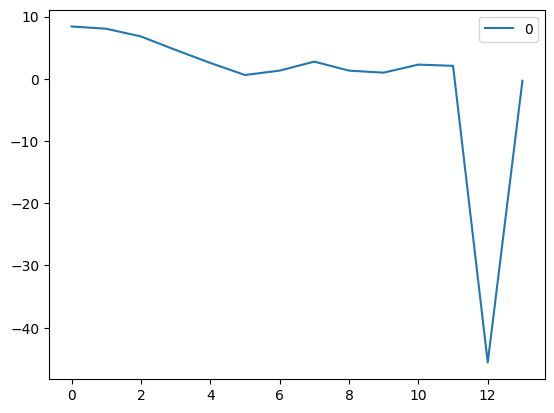

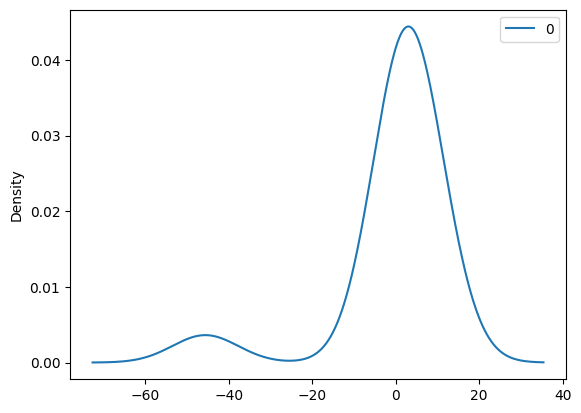

               0
count  14.000000
mean   -0.300295
std    13.322501
min   -45.580003
25%     1.061412
50%     2.173104
75%     4.163789
max     8.397715


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_DRI_fitted.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
model_DRI_fitted.predict(start=len(df_DRI), end=len(df_DRI))

array([-16.2089923])

**EAT**

In [ ]:
# df_EAT = df[df['entity'] == "EAT"]
# df_EAT["sales_yoy_float"]

df = df[['entity', 'period_end_dt', 'sales_yoy_float']]
df.columns = ['entity' , 'period_end_dt', 'sales_yoy_float']
# df.head()

df_EAT = df[['period_end_dt', 'sales_yoy_float']][df['entity'] == 'EAT']
# df_EAT.drop(27,axis=0, inplace=True)
# df_EAT.set_index('period_end_dt', inplace=True)
df_EAT

,period_end_dt,sales_yoy_float
14,2017-09-27,-2.8
15,2017-12-27,-0.8
16,2018-03-28,0.0
17,2018-06-27,0.7
18,2018-09-26,1.6
19,2018-12-26,2.5
20,2019-03-27,2.7
21,2019-06-26,1.7
22,2019-09-25,4.9
23,2019-12-25,11.4


In [ ]:
test_result=adfuller(df_EAT["sales_yoy_float"].dropna())
test_result

(-2.558862768322151,
 0.1018009999721956,
 3,
 9,
 {'1%': -4.473135048010974,
  '5%': -3.28988060356653,
  '10%': -2.7723823456790124},
 23.749314437249655)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
# Perform the ADF test
def adfuller_test(df):
    
    adf_statistic = test_result[0]
    p_value = test_result[1]
    num_lags = test_result[2]
    num_observations = test_result[3]
    
    print("ADF Test Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("#Lags Used:", num_lags)
    print("Number of Observations Used:", num_observations)
    
    if p_value <= 0.05:
        print("P-value is less than or equal to 0.05, which means we can reject the null hypothesis (Ho).")
        print("Therefore, we can conclude that the data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis, which indicates that the time series has a unit root.")
        print("This suggests that the data is non-stationary.")


adfuller_test(df_EAT["sales_yoy_float"])


ADF Test Statistic: -2.558862768322151
p-value: 0.1018009999721956
#Lags Used: 3
Number of Observations Used: 9
Weak evidence against the null hypothesis, which indicates that the time series has a unit root.
This suggests that the data is non-stationary.


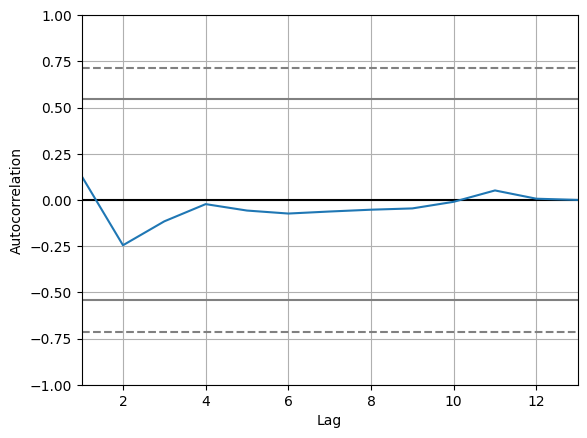

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_EAT["sales_yoy_float"])
plt.show()

In [ ]:
model_EAT = ARIMA(df_EAT["sales_yoy_float"].values, order=(0, 0, 1))
model_EAT_fitted = model_EAT.fit()
model_EAT_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -47.615
Date:                Thu, 11 May 2023   AIC                            101.230
Time:                        20:52:25   BIC                            102.925
Sample:                             0   HQIC                           100.882
                                 - 13                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7874      8.726     -0.090      0.928     -17.890      16.316
ma.L1          0.2151      0.975      0.221      0.825      -1.695       2.126
sigma2        88.5773     46.976      1.886      0.059      -3.495     180.649
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                35.53
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             173.22   Skew:                            -2.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

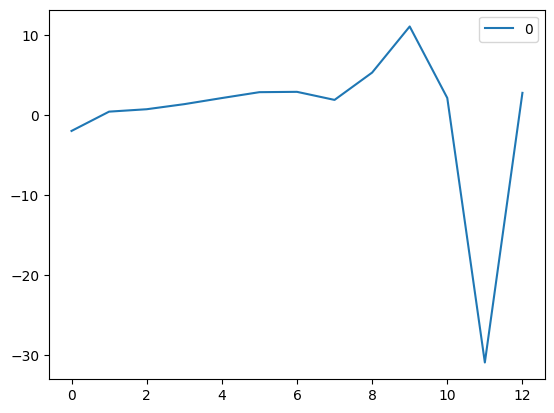

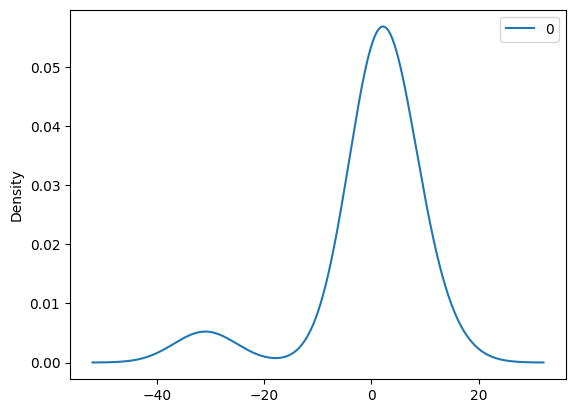

               0
count  13.000000
mean    0.025827
std     9.796625
min   -30.966595
25%     0.701226
50%     2.099835
75%     2.835625
max    11.050330


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(model_EAT_fitted.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


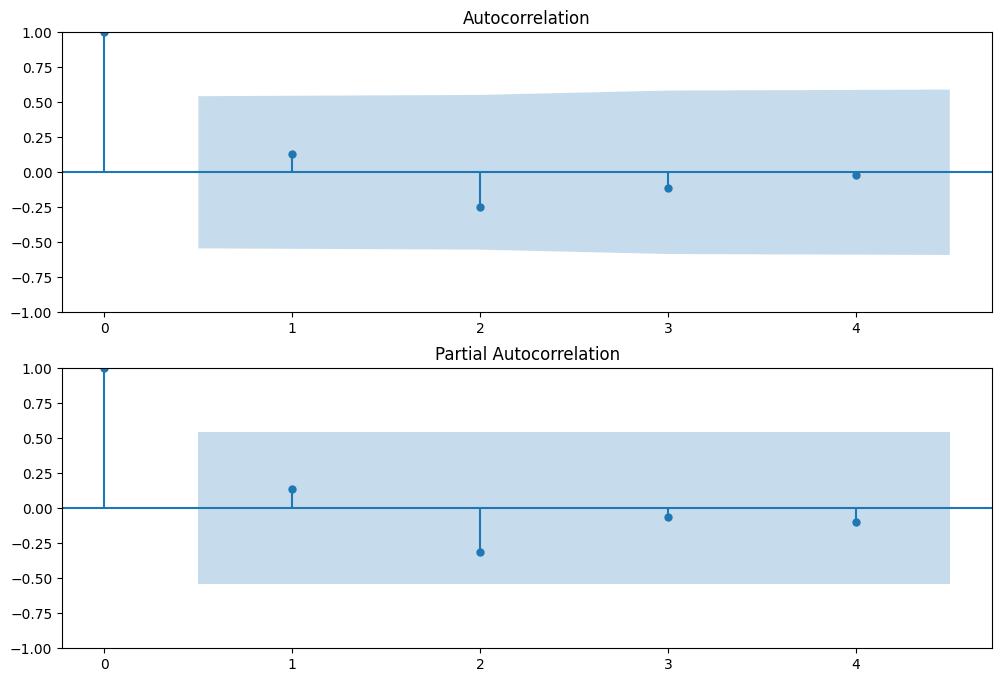

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EAT['sales_yoy_float'], lags=4, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EAT['sales_yoy_float'], lags=5, ax=ax2)

In [ ]:
model_EAT_fitted.predict(start=len(df_EAT), end=len(df_EAT))

array([-0.19597244])

**TXRH**

In [ ]:
# df_TXRH = df[df['entity'] == "TXRH"]
# df_TXRH["sales_yoy_float"]


df = df[['entity', 'period_end_dt', 'sales_yoy_float']]
df.columns = ['entity' , 'period_end_dt', 'sales_yoy_float']
# df.head()

TXRH = df[['period_end_dt', 'sales_yoy_float']][df['entity'] == 'TXRH']
# TXRH.drop(13,axis=0, inplace=True)
# TXRH.set_index('period_end_dt', inplace=True)
TXRH 

,period_end_dt,sales_yoy_float
0,2017-09-26,12.3
1,2017-12-26,12.6
2,2018-03-27,10.5
3,2018-06-26,11.0
4,2018-09-25,9.9
5,2018-12-25,11.0
6,2019-03-26,10.1
7,2019-06-25,9.7
8,2019-09-24,9.4
9,2019-12-31,19.7


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(TXRH["sales_yoy_float"].dropna())
test_result


(-3.317130971011193,
 0.014129871289370712,
 1,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 65.16470345538909)

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary
# Perform the ADF test
def adfuller_test(df):
    
    adf_statistic = test_result[0]
    p_value = test_result[1]
    num_lags = test_result[2]
    num_observations = test_result[3]
    
    print("ADF Test Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("#Lags Used:", num_lags)
    print("Number of Observations Used:", num_observations)
    
    if p_value <= 0.05:
        print("P-value is less than or equal to 0.05, which means we can reject the null hypothesis (Ho).")
        print("Therefore, we can conclude that the data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis, which indicates that the time series has a unit root.")
        print("This suggests that the data is non-stationary.")


adfuller_test(TXRH["sales_yoy_float"])

ADF Test Statistic: -3.317130971011193
p-value: 0.014129871289370712
#Lags Used: 1
Number of Observations Used: 11
P-value is less than or equal to 0.05, which means we can reject the null hypothesis (Ho).
Therefore, we can conclude that the data has no unit root and is stationary.


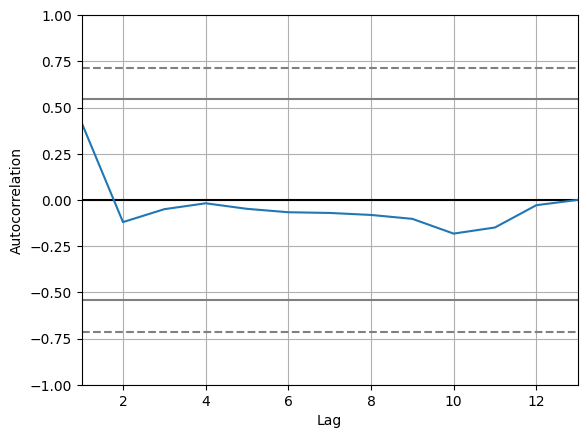

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(TXRH["sales_yoy_float"])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


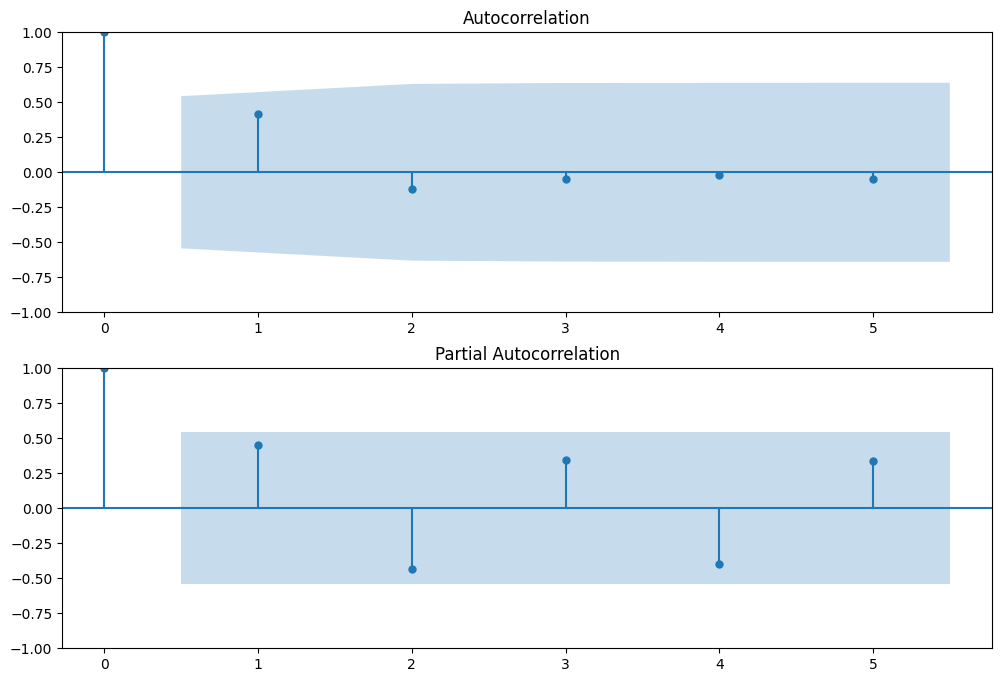

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TXRH['sales_yoy_float'], lags=5, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TXRH['sales_yoy_float'], lags=5, ax=ax2)

In [ ]:
model_TXRH = ARIMA(TXRH["sales_yoy_float"].values, order=(1, 0, 1))
TXRH_fitted = model_TXRH.fit()
TXRH_fitted.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -47.784
Date:                Thu, 11 May 2023   AIC                            103.568
Time:                        20:52:27   BIC                            105.828
Sample:                             0   HQIC                           103.104
                                 - 13                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2330      8.117      0.768      0.443      -9.676      22.142
ar.L1         -0.0436      0.594     -0.073      0.941      -1.207       1.120
ma.L1          0.9987     47.489      0.021      0.983     -92.079      94.076
sigma2        75.0240   3535.673      0.021      0.983   -6854.768    7004.816
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 5.83
Prob(Q):                              0.83   Prob(JB):                         0.05
Heteroskedasticity (H):              22.96   Skew:                            -1.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

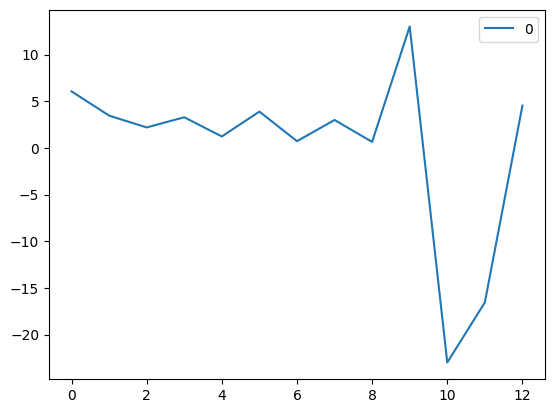

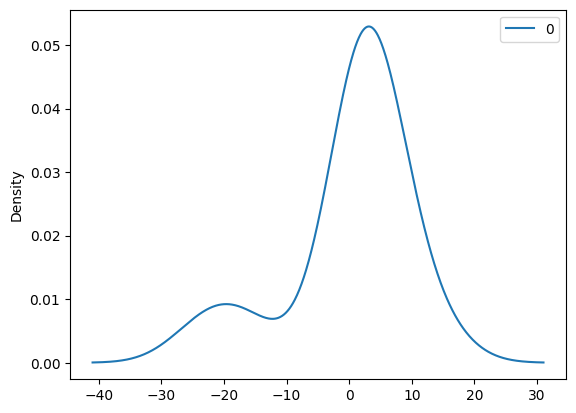

               0
count  13.000000
mean    0.195289
std     9.501963
min   -22.992540
25%     0.726121
50%     2.999203
75%     3.898456
max    13.020515


In [ ]:
from matplotlib import pyplot
residuals = pd.DataFrame(TXRH_fitted.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:

TXRH_fitted.predict(start=len(TXRH), end=len(TXRH))

array([10.84658158])

# **SPLIT train / test**

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
df_EAT = df[df['entity'] == "EAT"]
train_EAT, test_EAT = train_test_split(df_EAT["sales_yoy_float"].values, test_size=0.2, shuffle=False)
Tmodel_EAT = ARIMA(train_EAT, order=(0, 0, 1))
Tmodel_EAT_fitted = Tmodel_EAT.fit()
print(Tmodel_EAT_fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -24.531
Date:                Thu, 11 May 2023   AIC                             55.063
Time:                        21:04:11   BIC                             55.971
Sample:                             0   HQIC                            54.067
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4334      1.699      1.432      0.152      -0.896       5.763
ma.L1          0.9997   1137.165      0.001      0.999   -2227.803    2229.803
sigma2         6.2271   7078.813      0.001      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


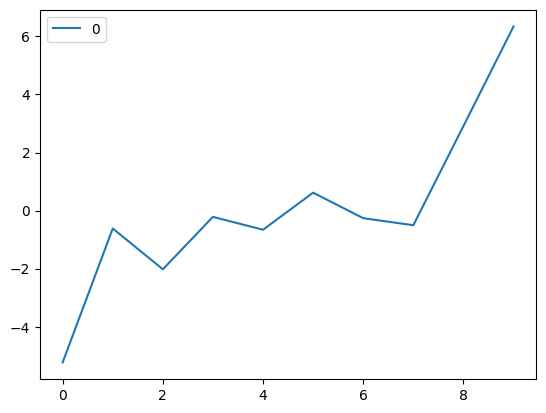

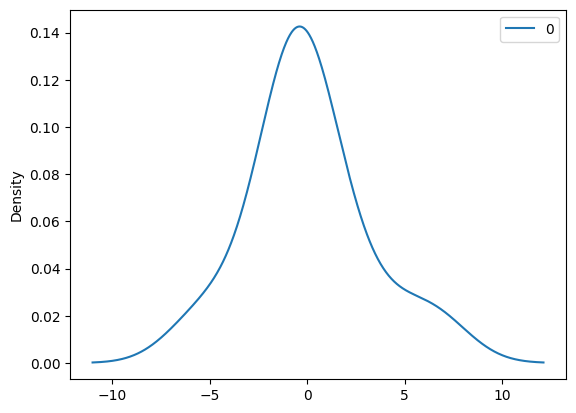

               0
count  10.000000
mean    0.035940
std     3.014125
min    -5.233410
25%    -0.649211
50%    -0.383077
75%     0.408295
max     6.343295


In [ ]:
from matplotlib import pyplot
EAT_residuals = pd.DataFrame(Tmodel_EAT_fitted.resid)
EAT_residuals.plot()
pyplot.show()
# density plot of residuals
EAT_residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(EAT_residuals.describe())

In [ ]:
Tmodel_EAT_fitted.predict(start=len(test_EAT), end=len(test_EAT))

array([0.91670543])

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
df_DRI = df[df['entity'] == "DRI"]
train_DRI, test_DRI = train_test_split(df_DRI["sales_yoy_float"].values, test_size=0.2, shuffle=False)
Tmodel_DRI = ARIMA(train_DRI, order=(0, 0, 1))
Tmodel_DRI_fitted = Tmodel_DRI.fit()
print(Tmodel_DRI_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -25.114
Date:                Thu, 11 May 2023   AIC                             56.227
Time:                        20:52:29   BIC                             57.421
Sample:                             0   HQIC                            55.475
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7666      1.769      4.390      0.000       4.299      11.234
ma.L1          0.9998    674.636      0.001      0.999   -1321.263    1323.262
sigma2         4.4928   3030.494      0.001      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


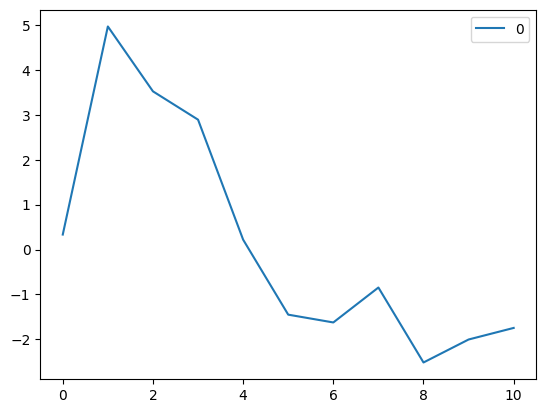

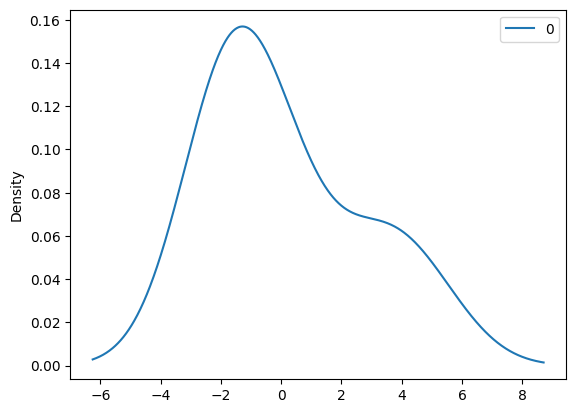

               0
count  11.000000
mean    0.159203
std     2.532893
min    -2.514764
25%    -1.684581
50%    -0.845788
75%     1.612569
max     4.966712


In [ ]:
from matplotlib import pyplot
DRI_residuals = pd.DataFrame(Tmodel_DRI_fitted.resid)
DRI_residuals.plot()
pyplot.show()
# density plot of residuals
DRI_residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(DRI_residuals.describe())

In [ ]:
Tmodel_DRI_fitted.predict(start=len(test_DRI), end=len(test_DRI))

array([10.40828751])

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
df_TXRH = df[df['entity'] == "TXRH"]
train_TXRH, test_TXRH = train_test_split(df_TXRH["sales_yoy_float"].values, test_size=0.2, shuffle=False)
Tmodel_TXRH = ARIMA(train_TXRH, order=(0, 0, 1))
Tmodel_TXRH_fitted = Tmodel_TXRH.fit()
print(Tmodel_TXRH_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -23.509
Date:                Thu, 11 May 2023   AIC                             53.019
Time:                        20:52:30   BIC                             53.926
Sample:                             0   HQIC                            52.023
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9936      0.472     23.298      0.000      10.069      11.918
ma.L1         -0.9987     84.965     -0.012      0.991    -167.526     165.529
sigma2         5.0803    431.542      0.012      0.9

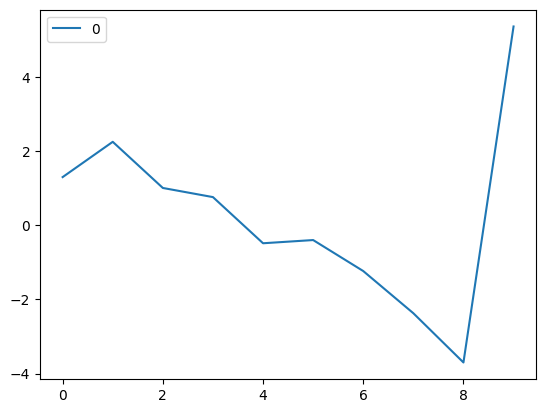

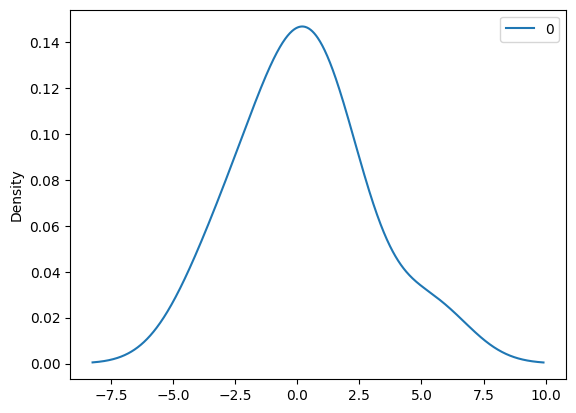

               0
count  10.000000
mean    0.254052
std     2.536364
min    -3.701377
25%    -1.043902
50%     0.185829
75%     1.232985
max     5.375169


In [ ]:
from matplotlib import pyplot
TXRH_residuals = pd.DataFrame(Tmodel_TXRH_fitted.resid)
TXRH_residuals.plot()
pyplot.show()
# density plot of residuals
TXRH_residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(TXRH_residuals.describe())

In [ ]:
Tmodel_TXRH_fitted.predict(start=len(test_TXRH), end=len(test_TXRH))

array([10.23403259])